In [16]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.


In [18]:
from yahoo_fin.stock_info import get_data

In [37]:
shop_data = get_data("shop", start_date = "12/01/2015", end_date = "11/30/2020", index_as_date = True, interval = "1d")
shop_data

,open,high,low,close,adjclose,volume,ticker
2015-12-01,26.180000,26.700001,26.180000,26.280001,26.280001,433000,SHOP
2015-12-02,26.320000,26.570000,25.799999,26.410000,26.410000,385500,SHOP
2015-12-03,26.500000,26.879999,26.129999,26.830000,26.830000,613700,SHOP
2015-12-04,26.850000,27.400000,26.540001,27.120001,27.120001,629300,SHOP
2015-12-07,26.629999,27.150000,26.540001,26.879999,26.879999,616200,SHOP
...,...,...,...,...,...,...,...
2020-11-20,976.000000,998.000000,973.000000,988.510010,988.510010,1683700,SHOP
2020-11-23,988.500000,989.690002,963.190002,980.010010,980.010010,1200700,SHOP
2020-11-24,978.000000,980.099976,963.000000,971.239990,971.239990,859700,SHOP
2020-11-25,976.419983,1021.109985,975.000000,1019.520020,1019.520020,1591700,SHOP


In [38]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [39]:
shop_data = pd.DataFrame(shop_data)
shop_data = shop_data.reset_index()
shop_data

,index,open,high,low,close,adjclose,volume,ticker
0,2015-12-01,26.180000,26.700001,26.180000,26.280001,26.280001,433000,SHOP
1,2015-12-02,26.320000,26.570000,25.799999,26.410000,26.410000,385500,SHOP
2,2015-12-03,26.500000,26.879999,26.129999,26.830000,26.830000,613700,SHOP
3,2015-12-04,26.850000,27.400000,26.540001,27.120001,27.120001,629300,SHOP
4,2015-12-07,26.629999,27.150000,26.540001,26.879999,26.879999,616200,SHOP
...,...,...,...,...,...,...,...,...
1253,2020-11-20,976.000000,998.000000,973.000000,988.510010,988.510010,1683700,SHOP
1254,2020-11-23,988.500000,989.690002,963.190002,980.010010,980.010010,1200700,SHOP
1255,2020-11-24,978.000000,980.099976,963.000000,971.239990,971.239990,859700,SHOP
1256,2020-11-25,976.419983,1021.109985,975.000000,1019.520020,1019.520020,1591700,SHOP


In [40]:
shop_data = shop_data.rename(columns={"index": "date"})
shop_data

,date,open,high,low,close,adjclose,volume,ticker
0,2015-12-01,26.180000,26.700001,26.180000,26.280001,26.280001,433000,SHOP
1,2015-12-02,26.320000,26.570000,25.799999,26.410000,26.410000,385500,SHOP
2,2015-12-03,26.500000,26.879999,26.129999,26.830000,26.830000,613700,SHOP
3,2015-12-04,26.850000,27.400000,26.540001,27.120001,27.120001,629300,SHOP
4,2015-12-07,26.629999,27.150000,26.540001,26.879999,26.879999,616200,SHOP
...,...,...,...,...,...,...,...,...
1253,2020-11-20,976.000000,998.000000,973.000000,988.510010,988.510010,1683700,SHOP
1254,2020-11-23,988.500000,989.690002,963.190002,980.010010,980.010010,1200700,SHOP
1255,2020-11-24,978.000000,980.099976,963.000000,971.239990,971.239990,859700,SHOP
1256,2020-11-25,976.419983,1021.109985,975.000000,1019.520020,1019.520020,1591700,SHOP


Text(0, 0.5, 'Closing Price')

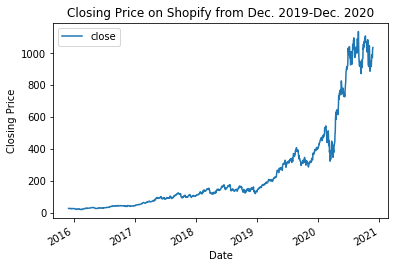

In [45]:
shop_data.plot(x='date', y='close', kind='line')
plt.title('Closing Price on Shopify from Dec. 2019-Dec. 2020')
plt.xlabel('Date')
plt.ylabel('Closing Price')

In [54]:
# Moving Averages
shop_data['twenty_ma'] = shop_data.close.rolling(window=20).mean()
shop_data['fifty_ma'] = shop_data.close.rolling(window=50).mean()
shop_data['twohund_ma'] = shop_data.close.rolling(window=200).mean()

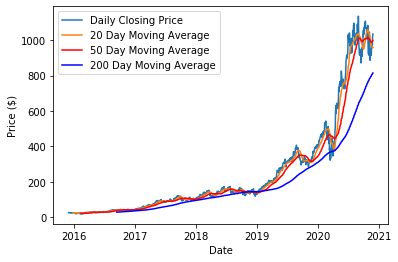

In [55]:
x = shop_data.date
plt.plot(x, shop_data.close, label='Daily Closing Price')
plt.plot(x, twenty_ma, label='20 Day Moving Average')
plt.plot(x, fifty_ma, label='50 Day Moving Average', color='red')
plt.plot(x, twohund_ma, label='200 Day Moving Average', color='blue')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [120]:
shop_data['percent_change'] = (shop_data['close']-shop_data['open'])/shop_data['open']
shop_data

,date,open,high,low,close,adjclose,volume,ticker,Percent Change,twenty_ma,fifty_ma,twohund_ma,VPT,Percent_Change,percent_change
0,2015-12-01,26.180000,26.700001,26.180000,26.280001,26.280001,433000,SHOP,0.003820,NaN,NaN,NaN,0.000000e+00,0.003820,0.003820
1,2015-12-02,26.320000,26.570000,25.799999,26.410000,26.410000,385500,SHOP,0.003419,NaN,NaN,NaN,1.906951e+03,0.003419,0.003419
2,2015-12-03,26.500000,26.879999,26.129999,26.830000,26.830000,613700,SHOP,0.012453,NaN,NaN,NaN,1.166667e+04,0.012453,0.012453
3,2015-12-04,26.850000,27.400000,26.540001,27.120001,27.120001,629300,SHOP,0.010056,NaN,NaN,NaN,1.846866e+04,0.010056,0.010056
4,2015-12-07,26.629999,27.150000,26.540001,26.879999,26.879999,616200,SHOP,0.009388,NaN,NaN,NaN,1.301553e+04,0.009388,0.009388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-11-20,976.000000,998.000000,973.000000,988.510010,988.510010,1683700,SHOP,0.012818,964.193997,990.437599,804.43515,3.733794e+06,0.012818,0.012818
1254,2020-11-23,988.500000,989.690002,963.190002,980.010010,980.010010,1200700,SHOP,-0.008589,961.291995,991.401199,806.87675,3.723469e+06,-0.008589,-0.008589
1255,2020-11-24,978.000000,980.099976,963.000000,971.239990,971.239990,859700,SHOP,-0.006912,955.709494,992.238198,809.26920,3.715776e+06,-0.006912,-0.006912
1256,2020-11-25,976.419983,1021.109985,975.000000,1019.520020,1019.520020,1591700,SHOP,0.044141,955.349997,994.924999,811.71055,3.794899e+06,0.044141,0.044141


Text(0, 0.5, 'Percent Change')

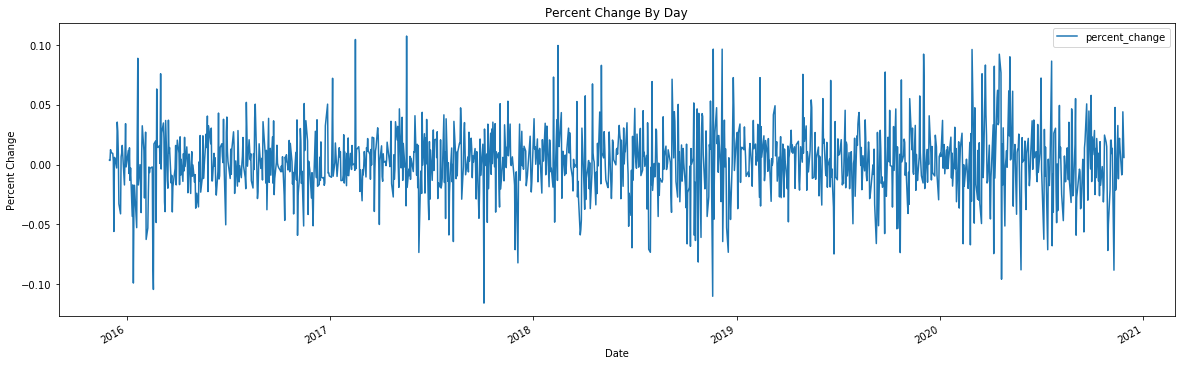

In [121]:
shop_data.plot(x='date', y='percent_change', kind='line', figsize=(20,6))
plt.title('Percent Change By Day')
plt.xlabel('Date')
plt.ylabel('Percent Change')

In [122]:
#Volume Price Trend (VPT) is an idicator often used to help predict the movement of a stock
shop_data['VPT']=0

In [123]:
for i in range(1,len(shop_data)):
    shop_data.loc[i,'VPT'] = shop_data.loc[i-1, 'VPT'] + shop_data.loc[i,'volume'] * (shop_data.loc[i,'close']-shop_data.loc[i-1,'close'])/shop_data.loc[i-1,'close']
shop_data

,date,open,high,low,close,adjclose,volume,ticker,Percent Change,twenty_ma,fifty_ma,twohund_ma,VPT,Percent_Change,percent_change
0,2015-12-01,26.180000,26.700001,26.180000,26.280001,26.280001,433000,SHOP,0.003820,NaN,NaN,NaN,0.000000e+00,0.003820,0.003820
1,2015-12-02,26.320000,26.570000,25.799999,26.410000,26.410000,385500,SHOP,0.003419,NaN,NaN,NaN,1.906951e+03,0.003419,0.003419
2,2015-12-03,26.500000,26.879999,26.129999,26.830000,26.830000,613700,SHOP,0.012453,NaN,NaN,NaN,1.166667e+04,0.012453,0.012453
3,2015-12-04,26.850000,27.400000,26.540001,27.120001,27.120001,629300,SHOP,0.010056,NaN,NaN,NaN,1.846866e+04,0.010056,0.010056
4,2015-12-07,26.629999,27.150000,26.540001,26.879999,26.879999,616200,SHOP,0.009388,NaN,NaN,NaN,1.301553e+04,0.009388,0.009388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-11-20,976.000000,998.000000,973.000000,988.510010,988.510010,1683700,SHOP,0.012818,964.193997,990.437599,804.43515,3.733794e+06,0.012818,0.012818
1254,2020-11-23,988.500000,989.690002,963.190002,980.010010,980.010010,1200700,SHOP,-0.008589,961.291995,991.401199,806.87675,3.723469e+06,-0.008589,-0.008589
1255,2020-11-24,978.000000,980.099976,963.000000,971.239990,971.239990,859700,SHOP,-0.006912,955.709494,992.238198,809.26920,3.715776e+06,-0.006912,-0.006912
1256,2020-11-25,976.419983,1021.109985,975.000000,1019.520020,1019.520020,1591700,SHOP,0.044141,955.349997,994.924999,811.71055,3.794899e+06,0.044141,0.044141


Text(0, 0.5, 'VPT')

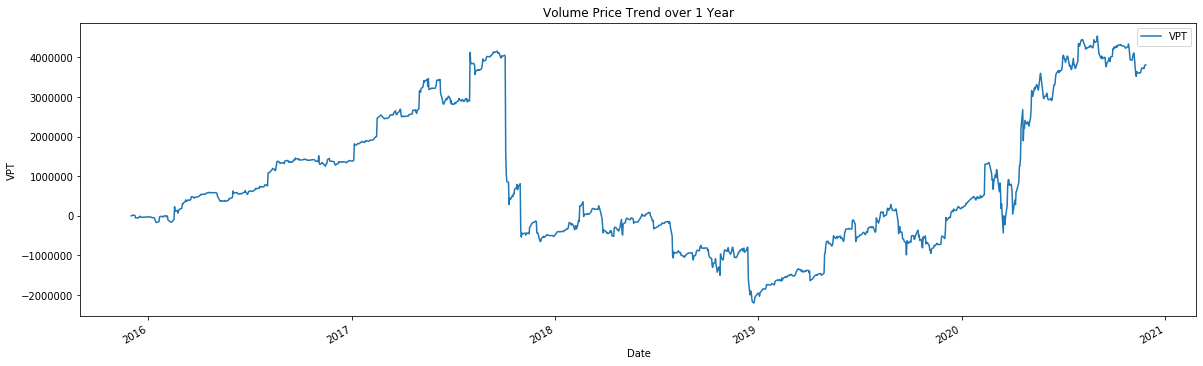

In [124]:
shop_data.plot(x='date', y='VPT', kind='line',figsize=(20,6), logy=False)
plt.title('Volume Price Trend over 1 Year')
plt.xlabel('Date')
plt.ylabel('VPT')

In [125]:
mask = (shop_data['date'] > '2019-06-01') & (shop_data['date'] <= '2020-06-01')
selected_year = shop_data.loc[mask]

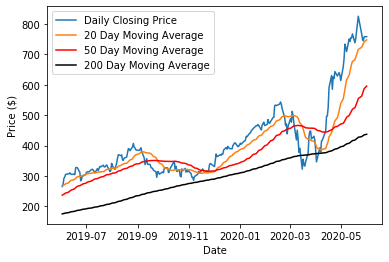

<Figure size 72x72 with 0 Axes>

In [126]:
x = selected_year.date
plt.plot(x, selected_year.close, label='Daily Closing Price')
plt.plot(x, selected_year.twenty_ma, label='20 Day Moving Average')
plt.plot(x, selected_year.fifty_ma, label='50 Day Moving Average', color='red')
plt.plot(x, selected_year.twohund_ma, label='200 Day Moving Average', color='black')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.figure(figsize=(1,1))
plt.show()

Text(0, 0.5, 'Percent Change')

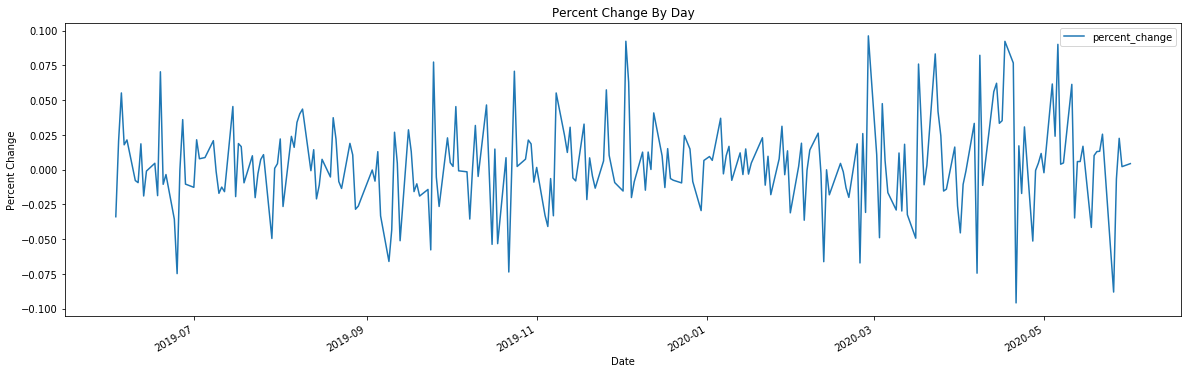

In [127]:
selected_year.plot(x='date', y='percent_change', kind='line', figsize=(20,6))
plt.title('Percent Change By Day')
plt.xlabel('Date')
plt.ylabel('Percent Change')

In [128]:
large_neg_drop = selected_year['percent_change'].min()
large_gain = selected_year['percent_change'].max()
date_neg_drop = selected_year[selected_year['percent_change'] == large_neg_drop]['date'].values[0]
date_gain = selected_year[selected_year['percent_change'] == large_gain]['date'].values[0]

In [129]:
print(large_gain, date_gain)
print(large_neg_drop, date_neg_drop)

0.09624140654018541 2020-02-28T00:00:00.000000000
-0.09582689335394126 2020-04-21T00:00:00.000000000


In [130]:
selected_year['Ten_Day_Swings'] = 0
selected_year.head()

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,open,high,low,close,adjclose,volume,ticker,Percent Change,twenty_ma,fifty_ma,twohund_ma,VPT,Percent_Change,percent_change,Ten_Day_Swings
880,2019-06-03,274.279999,277.510010,262.170013,265.000000,265.000000,2535800,SHOP,-0.033834,268.165498,236.652198,175.09360,-643465.031155,-0.033834,-0.033834,0
881,2019-06-04,268.470001,274.100006,264.109985,274.000000,274.000000,1603000,SHOP,0.020598,268.589498,238.157198,175.76900,-589023.521721,0.020598,0.020598,0
882,2019-06-05,277.220001,292.859985,277.119995,292.519989,292.519989,2342100,SHOP,0.055191,270.280997,239.978598,176.53580,-430718.170375,0.055191,0.055191,0
883,2019-06-06,291.839996,299.109985,289.010010,297.059998,297.059998,1867300,SHOP,0.017887,272.058497,241.832398,177.33515,-401737.046779,0.017887,0.017887,0
884,2019-06-07,298.660004,309.369995,298.399994,305.049988,305.049988,2344700,SHOP,0.021396,274.279996,243.931798,178.18055,-338671.907559,0.021396,0.021396,0


In [131]:
selected_year['ten'] = selected_year.percent_change.rolling(window=10).sum()
selected_year

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,open,high,low,close,adjclose,volume,ticker,Percent Change,twenty_ma,fifty_ma,twohund_ma,VPT,Percent_Change,percent_change,Ten_Day_Swings,ten
880,2019-06-03,274.279999,277.510010,262.170013,265.000000,265.000000,2535800,SHOP,-0.033834,268.165498,236.652198,175.093600,-6.434650e+05,-0.033834,-0.033834,0,NaN
881,2019-06-04,268.470001,274.100006,264.109985,274.000000,274.000000,1603000,SHOP,0.020598,268.589498,238.157198,175.769000,-5.890235e+05,0.020598,0.020598,0,NaN
882,2019-06-05,277.220001,292.859985,277.119995,292.519989,292.519989,2342100,SHOP,0.055191,270.280997,239.978598,176.535800,-4.307182e+05,0.055191,0.055191,0,NaN
883,2019-06-06,291.839996,299.109985,289.010010,297.059998,297.059998,1867300,SHOP,0.017887,272.058497,241.832398,177.335150,-4.017370e+05,0.017887,0.017887,0,NaN
884,2019-06-07,298.660004,309.369995,298.399994,305.049988,305.049988,2344700,SHOP,0.021396,274.279996,243.931798,178.180550,-3.386719e+05,0.021396,0.021396,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2020-05-26,842.000000,844.000000,742.369995,767.890015,767.890015,6465100,SHOP,-0.088017,723.128003,562.138802,429.257451,3.148214e+06,-0.088017,-0.088017,0,-0.073774
1128,2020-05-27,755.010010,757.000000,685.000000,750.000000,750.000000,6859600,SHOP,-0.006636,728.945502,570.693002,431.157701,2.988402e+06,-0.006636,-0.006636,0,-0.045663
1129,2020-05-28,728.010010,770.400024,727.825012,744.429993,744.429993,3753000,SHOP,0.022555,734.167502,578.479802,433.046201,2.960529e+06,0.022555,0.022555,0,-0.028948
1130,2020-05-29,756.150024,769.390015,738.000000,757.799988,757.799988,3306900,SHOP,0.002182,740.443002,586.899202,434.989051,3.019921e+06,0.002182,0.002182,0,-0.032634


Text(0, 0.5, 'Accumulation of Percent Change over Previous 10 Days')

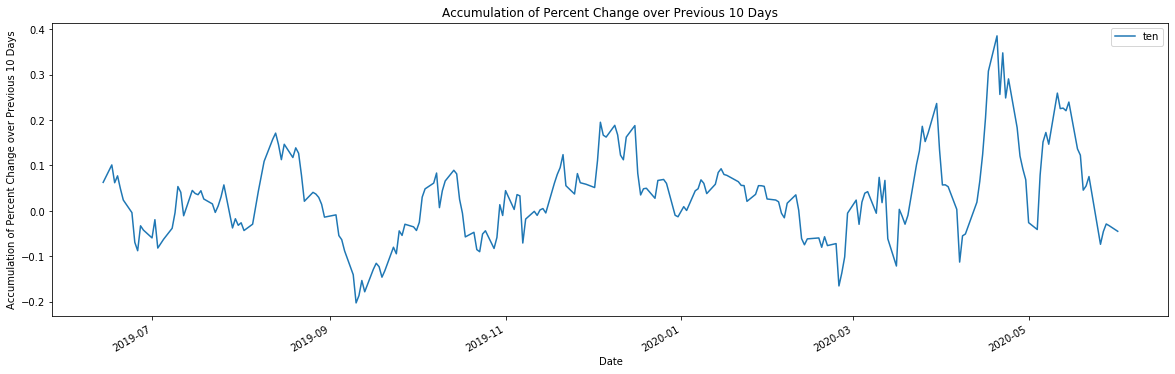

In [132]:
selected_year.plot(x='date', y='ten', kind='line', figsize=(20,6))
plt.title('Accumulation of Percent Change over Previous 10 Days')
plt.xlabel('Date')
plt.ylabel('Accumulation of Percent Change over Previous 10 Days')